***

## Задание 2 

(frame_2 (1).7z).

1. Определить портрет читающих маркетинговые рассылки.
2. Имеется ли корреляция между датой/временем отправки письма и его прочтением
3. Имеется ли региональные особенности среди потребителей данного маркетинговых рассылок

***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Настройка отображения графиков

sns.set(
    font_scale=2,
    style="darkgrid",
    rc={'figure.figsize':(10,10)}
        )

In [3]:
plt.style.use("dark_background") # применим темную тему для графиков

In [4]:
import py7zr
with py7zr.SevenZipFile('C:/Users/alyap/Finam/frame_2 (1).7z', mode='r') as z:
    z.extractall()

In [5]:
df = pd.read_csv('C:/Users/alyap/Finam/frame_2.csv')

In [6]:
df.head()

,Id,Город,Пол,Дата рождения,Дата отправки,Статус отправки,Название_письма
0,2,Мытищи,мужской,1964-02-24,2020-11-19 00:46:09,Открыто,Еженедельный Аналитический Дайджест
1,2,Мытищи,мужской,1964-02-24,2020-11-26 01:58:27,Открыто,Еженедельный Аналитический Дайджест
2,2,Мытищи,мужской,1964-02-24,2020-11-27 00:24:05,Отправлено,Еженедельный Аналитический Дайджест
3,2,Мытищи,мужской,1964-02-24,2020-12-03 02:21:10,Открыто,Еженедельный Аналитический Дайджест
4,2,Мытищи,мужской,1964-02-24,2020-12-04 00:46:05,Отправлено,Еженедельный Аналитический Дайджест


In [7]:
df.shape # Размер датафрейма

(360127, 7)

In [8]:
df.dtypes

Id                  int64
Город              object
Пол                object
Дата рождения      object
Дата отправки      object
Статус отправки    object
Название_письма    object
dtype: object

Необходимо преобразовать временные типы данных в date, datetime

In [9]:
df['Дата рождения'] = pd.to_datetime(df['Дата рождения'])

In [10]:
df['Дата отправки'] = pd.to_datetime(df['Дата отправки'])

In [11]:
df.duplicated().sum() # Проверка на дубликаты. 

9

In [12]:
df.drop_duplicates(inplace=True) # имеем 9 дублирующих строк, удаляем дубли

In [13]:
df.shape

(360118, 7)

In [14]:
df.isna().sum()

Id                   0
Город                0
Пол                  0
Дата рождения      120
Дата отправки        0
Статус отправки     31
Название_письма      0
dtype: int64

В датафрейме есть пропущенные значения в колонках дата рождени и статус отправки

In [15]:
df['Название_письма'].value_counts()

Еженедельный Аналитический Дайджест    360118
Name: Название_письма, dtype: int64

Название письма одинаково в датафрейме

Изучаем пропущенные даты рождения

In [16]:
df[df['Дата рождения'].isna() == True]['Пол'].value_counts()

мужской    120
Name: Пол, dtype: int64

Список городов, в которых есть пропущенная дата рождения

In [17]:
date_null = df[df['Дата рождения'].isna() == True]['Город'].value_counts().reset_index()['index'].tolist()
date_null

['Уфа', 'Санкт-Петербург', 'Омск', 'Видное', 'Белгород', 'Улан-Удэ']

Найдем максимальную дату отправки

In [18]:
max_date = df['Дата отправки'].dt.date.max()
max_date

datetime.date(2021, 5, 31)

Рассчитаем возраст пользователей

In [19]:
df['Возраст'] = df['Дата рождения'].apply(
               lambda x: max_date.year - x.year - 
               ((max_date.month, max_date.day) < (x.month, x.day)) 
               )

C:\Users\alyap\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Возраст'>

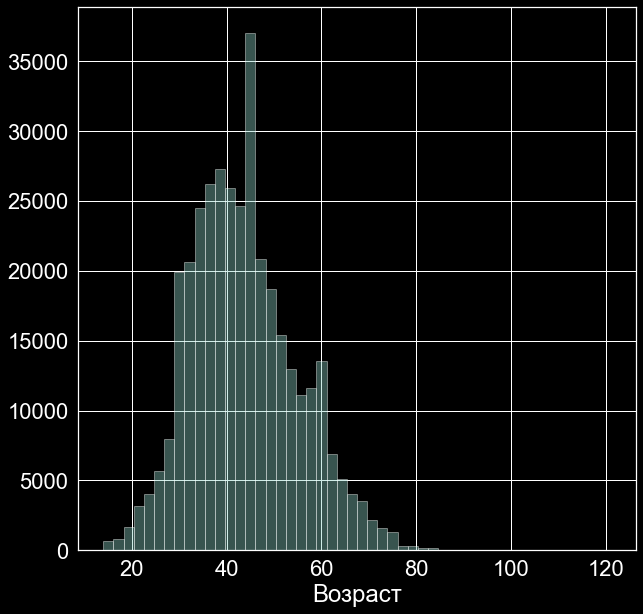

In [20]:
sns.distplot(df['Возраст'], kde=False)

In [21]:
df['Возраст'].describe()

count    359998.000000
mean         43.578859
std          11.177346
min          14.000000
25%          36.000000
50%          42.000000
75%          51.000000
max         121.000000
Name: Возраст, dtype: float64

In [22]:
df['Возраст'].mean()

43.578858771437616

Медианный и средний возраст выборки близки по значению, средний возраст мужчин и женщин также практически не отличается.

In [23]:
df.query('Город in @date_null').groupby('Город', as_index=False).agg({'Возраст':'mean'})

,Город,Возраст
0,Белгород,45.124060
1,Видное,41.702247
2,Омск,44.022834
3,Санкт-Петербург,43.163294
4,Улан-Удэ,43.199616
5,Уфа,43.002021


In [24]:
avg_age = df.query('Город in @date_null and Пол == "мужской"').groupby('Город', as_index=False)\
                .agg({'Возраст':'mean'})['Возраст'].mean()
avg_age = int(avg_age)
avg_age

42

Средний возраст в данных городах равен медианному по всей выборке.   
Т.к. пропущенные даты рождения относятся к мужскому полу, добавим дополнительный фильтр по полу.   
Заменим пропущенные значения на среднее данной выборки

In [25]:
df['Возраст'].fillna(avg_age, inplace=True)

In [26]:
df['Возраст'].isna().sum()

0

Рассмотрим статусы отправки

Пропущенные значения

In [27]:
status =  df[df['Статус отправки'].isna() == True]
status

,Id,Город,Пол,Дата рождения,Дата отправки,Статус отправки,Название_письма,Возраст
12826,884,Белорецк,мужской,1987-12-02,2020-12-10 01:47:24,NaN,Еженедельный Аналитический Дайджест,33.0
12904,893,Обнинск,мужской,1986-10-05,2021-04-14 23:06:15,NaN,Еженедельный Аналитический Дайджест,34.0
18615,1304,Балашиха,женский,1989-05-16,2021-05-27 22:52:52,NaN,Еженедельный Аналитический Дайджест,32.0
59613,4124,Ростов-на-Дону,мужской,1968-03-13,2021-01-02 02:04:06,NaN,Еженедельный Аналитический Дайджест,53.0
70655,4835,Архангельск,мужской,1976-08-05,2021-05-14 22:47:00,NaN,Еженедельный Аналитический Дайджест,44.0
81258,5530,"Казань, офис на Пушкина",женский,1984-01-14,2020-12-24 02:22:26,NaN,Еженедельный Аналитический Дайджест,37.0
115713,7927,Пермь,мужской,1975-03-07,2020-11-26 01:52:40,NaN,Еженедельный Аналитический Дайджест,46.0
129149,8832,Сургут,женский,1961-08-24,2021-01-11 02:02:38,NaN,Еженедельный Аналитический Дайджест,59.0
140825,9600,Барнаул,мужской,1970-07-01,2021-03-12 01:54:30,NaN,Еженедельный Аналитический Дайджест,50.0
144871,9874,Владимир,мужской,1982-12-01,2021-01-12 02:30:17,NaN,Еженедельный Аналитический Дайджест,38.0


In [28]:
status.shape

(31, 8)

В настоящий момент мы не можем знать причины отсутствия данных по отправки этих писем.   
Заменим пропуски на статус Нет данных

In [29]:
df['Статус отправки'] = df['Статус отправки'].fillna('Нет_данных')

In [30]:
status_groups = df.groupby('Статус отправки', as_index=False).agg({'Id':'count'})\
                                            .rename(columns={'Id':'Количество'})
status_groups

,Статус отправки,Количество
0,Не отправлено,669
1,Нет_данных,31
2,Открыто,87507
3,Отправлено,265043
4,Переход по ссылке,6868


In [31]:
status_groups['Процент'] = round(status_groups['Количество'] / status_groups['Количество'].sum() * 100,2)

In [32]:
status_groups

,Статус отправки,Количество,Процент
0,Не отправлено,669,0.19
1,Нет_данных,31,0.01
2,Открыто,87507,24.30
3,Отправлено,265043,73.60
4,Переход по ссылке,6868,1.91


Самый частый статус - Отправлено (73% в датафрейме)   
Заменим этим статусом пропущенные значения

Проверим запись городов в датафрейме.   


In [33]:
df[df['Город'].str.split(',').str[1].isna() == False]['Город'].value_counts()

Екатеринбург, офис на Белинского                 6894
Челябинск, офис на улице Красной                 5818
Казань, офис на Пушкина                          3355
Казань, офис на Декабристов                      1615
Казань, офис на Зорге                            1167
Санкт-Петербург, офис на Б.Московской             702
Калининград, офис на Черняховского                626
Екатеринбург, офис на Шейнкмана                   615
Москва, головной офис                             476
Калининград, офис на Театральной                  440
Казань, офис на Спартаковской                     399
Санкт-Петербург, офис на Московском проспекте      86
Name: Город, dtype: int64

В нескольких городах запись более конкретизирована адресом офиса, избавимся от конкретики и оставим только наименование города.

In [34]:
df['Город'] = df['Город'].str.split(',').str[0]

In [35]:
df.head()

,Id,Город,Пол,Дата рождения,Дата отправки,Статус отправки,Название_письма,Возраст
0,2,Мытищи,мужской,1964-02-24,2020-11-19 00:46:09,Открыто,Еженедельный Аналитический Дайджест,57.0
1,2,Мытищи,мужской,1964-02-24,2020-11-26 01:58:27,Открыто,Еженедельный Аналитический Дайджест,57.0
2,2,Мытищи,мужской,1964-02-24,2020-11-27 00:24:05,Отправлено,Еженедельный Аналитический Дайджест,57.0
3,2,Мытищи,мужской,1964-02-24,2020-12-03 02:21:10,Открыто,Еженедельный Аналитический Дайджест,57.0
4,2,Мытищи,мужской,1964-02-24,2020-12-04 00:46:05,Отправлено,Еженедельный Аналитический Дайджест,57.0


Задача: требуется определить портрет читающих маркетинговые рассылки.   
Датасет подготовлен.   
Считаем читающими пользователей, которые открывают наши пиьма и переходят по ссылке.   
Всего ~ 26% таких пользователей.

In [36]:
reading = df[(df['Статус отправки']	== "Открыто") | (df['Статус отправки'] == "Переход по ссылке")]

In [37]:
reading.head()

,Id,Город,Пол,Дата рождения,Дата отправки,Статус отправки,Название_письма,Возраст
0,2,Мытищи,мужской,1964-02-24,2020-11-19 00:46:09,Открыто,Еженедельный Аналитический Дайджест,57.0
1,2,Мытищи,мужской,1964-02-24,2020-11-26 01:58:27,Открыто,Еженедельный Аналитический Дайджест,57.0
3,2,Мытищи,мужской,1964-02-24,2020-12-03 02:21:10,Открыто,Еженедельный Аналитический Дайджест,57.0
5,2,Мытищи,мужской,1964-02-24,2020-12-10 02:01:21,Переход по ссылке,Еженедельный Аналитический Дайджест,57.0
7,2,Мытищи,мужской,1964-02-24,2020-12-17 01:48:16,Открыто,Еженедельный Аналитический Дайджест,57.0


Рассмотрим пользователей по количеству прочтенных писем

In [38]:
reading_users = reading.groupby('Id',as_index=False).agg({'Статус отправки':'count'})\
                                                    .sort_values('Статус отправки',ascending=False)\
                                                    .rename(columns={'Статус отправки':'Количетсво_прочтенных_писем'})

In [39]:
reading_users

,Id,Количетсво_прочтенных_писем
710,1448,127
2261,4457,69
5423,10555,61
5489,10675,58
12358,23833,57
...,...,...
9999,19434,1
1582,3137,1
620,1271,1
10004,19443,1


In [40]:
reading_users.query('Количетсво_прочтенных_писем <= 2')['Id'].count() / reading_users['Id'].count()

0.33281053952321205

Достаточно большое количество пользователей открывали письмо всего 1-2 раза (33%).   
Возможно их не заинтересовала рассылка.   
Не относим данных пользователей к постоянным.


In [41]:
reading_users = reading_users.query('Количетсво_прочтенных_писем > 2')

In [42]:
reading_ = reading.merge(reading_users['Id'], how = 'right', on = 'Id')

In [43]:
reading_.head()

,Id,Город,Пол,Дата рождения,Дата отправки,Статус отправки,Название_письма,Возраст
0,1448,Ухта,мужской,1957-07-11,2020-11-19 00:14:44,Открыто,Еженедельный Аналитический Дайджест,63.0
1,1448,Ухта,мужской,1957-07-11,2020-11-19 00:37:18,Открыто,Еженедельный Аналитический Дайджест,63.0
2,1448,Ухта,мужской,1957-07-11,2020-11-19 00:38:29,Открыто,Еженедельный Аналитический Дайджест,63.0
3,1448,Ухта,мужской,1957-07-11,2020-11-19 00:51:26,Открыто,Еженедельный Аналитический Дайджест,63.0
4,1448,Ухта,мужской,1957-07-11,2020-11-26 01:41:40,Открыто,Еженедельный Аналитический Дайджест,63.0


Проанализируем возраст пользователей

In [44]:
age_group = reading_.groupby(['Id', 'Пол'],as_index=False).agg({'Возраст':'min'})

In [45]:
age_group.head()

,Id,Пол,Возраст
0,2,мужской,57.0
1,3,мужской,27.0
2,5,мужской,34.0
3,8,мужской,61.0
4,13,женский,25.0


In [46]:
age_group['Возраст'].describe()

count    8508.000000
mean       44.542901
std        11.192521
min        14.000000
25%        36.000000
50%        44.000000
75%        52.000000
max        87.000000
Name: Возраст, dtype: float64

<AxesSubplot:xlabel='Пол', ylabel='Возраст'>

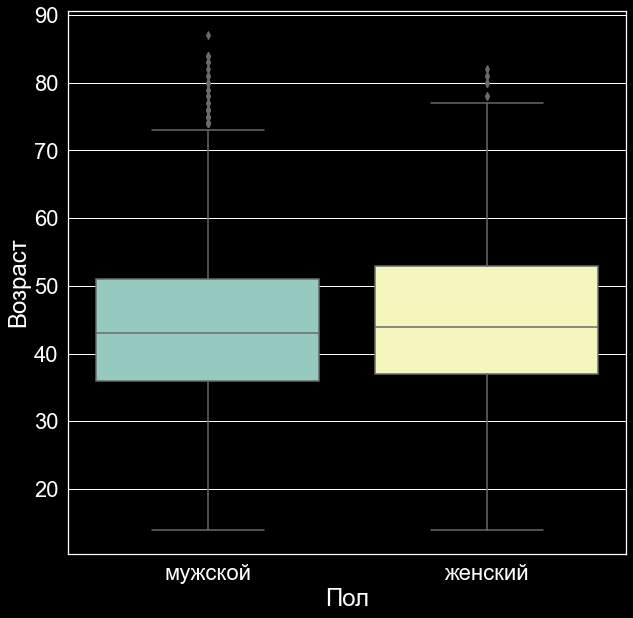

In [47]:
sns.boxplot(data = age_group, y = 'Возраст', x ='Пол')

In [48]:
a = age_group['Возраст'].quantile(0.01)
a

21.0

In [49]:
b = age_group['Возраст'].quantile(0.96)
b

66.0

Средний возраст читателей составляет 44 года, средний возраст мужчин и женщин практически не отличается/   
Возраст 95% пользоватлелей от 21 до 66 лет.

Рассмотрим читателей по половому признаку

In [50]:
gender_group = age_group.groupby('Пол', as_index=False).agg({'Id':'count'}).rename(columns={'Id':'Количетсво'})


In [51]:
gender_group['Процент'] = round(gender_group['Количетсво'] / gender_group['Количетсво'].sum() * 100,2)

In [52]:
gender_group

,Пол,Количетсво,Процент
0,женский,2080,24.45
1,мужской,6428,75.55


Рассмотрим из каких городов наши читатели

In [53]:
cities = reading_.groupby('Город', as_index=False).agg({'Id':'nunique'})\
                                        .rename(columns={'Id':'Количетсво'})\
                                        .sort_values('Количетсво', ascending=False)
cities['Процент'] = round(cities['Количетсво'] / cities['Количетсво'].sum() * 100,2)
cities.head()

,Город,Количетсво,Процент
294,Москва,1761,20.70
415,Санкт-Петербург,555,6.52
505,Уфа,193,2.27
227,Краснодар,192,2.26
323,Нижний Новгород,189,2.22


In [54]:
cities.head(50)['Процент'].sum()

73.44999999999999

In [55]:
cities.head(50)

,Город,Количетсво,Процент
294,Москва,1761,20.70
415,Санкт-Петербург,555,6.52
505,Уфа,193,2.27
227,Краснодар,192,2.26
323,Нижний Новгород,189,2.22
137,Екатеринбург,161,1.89
170,Казань,142,1.67
334,Новосибирск,139,1.63
164,Иркутск,136,1.60
520,Челябинск,131,1.54


## Портрет читающих маркетинговые рассылки:

Исходя из представленных данных можем сказать следующее о наших читателях:

 * Жители крупных городов, городов-миллинников, областных центров. Значительная доля приходится на жителей Москвы и Московской области(~ 22%),   
   Санкт-Петербурга (~ 6.5%), остальная большая доля приходится на остальные крупные города (доля каждого города менее 2.5%);
 * Большая часть читателей - мужчины (75%);
 * 95% пользоватлелей трудоспособного возраста от 21 до 66 лет (75% старше 36 лет). Средний возраст - 44 года.

**2.Проверка корреляции между датой/временем отправки письма**

Сделаем копию датафрейма

In [56]:
data = df.copy()

In [57]:
data.head()

,Id,Город,Пол,Дата рождения,Дата отправки,Статус отправки,Название_письма,Возраст
0,2,Мытищи,мужской,1964-02-24,2020-11-19 00:46:09,Открыто,Еженедельный Аналитический Дайджест,57.0
1,2,Мытищи,мужской,1964-02-24,2020-11-26 01:58:27,Открыто,Еженедельный Аналитический Дайджест,57.0
2,2,Мытищи,мужской,1964-02-24,2020-11-27 00:24:05,Отправлено,Еженедельный Аналитический Дайджест,57.0
3,2,Мытищи,мужской,1964-02-24,2020-12-03 02:21:10,Открыто,Еженедельный Аналитический Дайджест,57.0
4,2,Мытищи,мужской,1964-02-24,2020-12-04 00:46:05,Отправлено,Еженедельный Аналитический Дайджест,57.0


Выделим отдельно часы отправки и день недели.

In [58]:
data['Час_отправки'] = data['Дата отправки'].dt.hour

In [59]:
data['День_недели'] = data['Дата отправки'].dt.day_name()

In [60]:
data.head(10)

,Id,Город,Пол,Дата рождения,Дата отправки,Статус отправки,Название_письма,Возраст,Час_отправки,День_недели
0,2,Мытищи,мужской,1964-02-24,2020-11-19 00:46:09,Открыто,Еженедельный Аналитический Дайджест,57.0,0,Thursday
1,2,Мытищи,мужской,1964-02-24,2020-11-26 01:58:27,Открыто,Еженедельный Аналитический Дайджест,57.0,1,Thursday
2,2,Мытищи,мужской,1964-02-24,2020-11-27 00:24:05,Отправлено,Еженедельный Аналитический Дайджест,57.0,0,Friday
3,2,Мытищи,мужской,1964-02-24,2020-12-03 02:21:10,Открыто,Еженедельный Аналитический Дайджест,57.0,2,Thursday
4,2,Мытищи,мужской,1964-02-24,2020-12-04 00:46:05,Отправлено,Еженедельный Аналитический Дайджест,57.0,0,Friday
5,2,Мытищи,мужской,1964-02-24,2020-12-10 02:01:21,Переход по ссылке,Еженедельный Аналитический Дайджест,57.0,2,Thursday
6,2,Мытищи,мужской,1964-02-24,2020-12-11 00:17:14,Отправлено,Еженедельный Аналитический Дайджест,57.0,0,Friday
7,2,Мытищи,мужской,1964-02-24,2020-12-17 01:48:16,Открыто,Еженедельный Аналитический Дайджест,57.0,1,Thursday
8,2,Мытищи,мужской,1964-02-24,2020-12-17 23:44:47,Отправлено,Еженедельный Аналитический Дайджест,57.0,23,Thursday
9,2,Мытищи,мужской,1964-02-24,2020-12-24 02:26:17,Открыто,Еженедельный Аналитический Дайджест,57.0,2,Thursday


In [61]:
data.Час_отправки.dtypes

dtype('int64')

Заменим в часах 0 на 24

In [62]:
data.Час_отправки = np.where(data.Час_отправки == 0, 24, data.Час_отправки)

Разделим часы на группы:   
 * с 7 до 11 утра;
 * с 12 до 16;
 * с 17 до 20;
 * с 21 до 24;
 * с 1 до 6

In [63]:
data['Временная_группа'] = pd.cut(data['Час_отправки'], [0, 6, 11, 16, 20, 24],\
                                  labels = ['с 1 до 6', 'с 7 до 11', 'с 12 до 16', 'с 17 до 20', 'с 21 до 24'])

In [64]:
data['Временная_группа'].value_counts()

с 21 до 24    337394
с 1 до 6       16738
с 12 до 16      3185
с 7 до 11       2801
с 17 до 20         0
Name: Временная_группа, dtype: int64

In [65]:
data['Временная_группа'].isna().sum()

0

In [66]:
data['Статус отправки'].value_counts()

Отправлено           265043
Открыто               87507
Переход по ссылке      6868
Не отправлено           669
Нет_данных               31
Name: Статус отправки, dtype: int64

Для проверки корреляции прочтения письма со временем отправки, статус отправки оставим открыто / отправлено.   
Однако у нас также есть статус Переход по ссылке, который предполагает собой прочтение письма, а также переход по ссылке в теле письма.   
Заменим данный статус на открыто. Не отправленные данные уберем из датафрейма.

In [67]:
data['Статус отправки'] = data['Статус отправки'].str.replace('Переход по ссылке', 'Открыто')

In [68]:
data = data[data['Статус отправки'] != "Не отправлено"]

In [69]:
data['Статус отправки'].value_counts()

Отправлено    265043
Открыто        94375
Нет_данных        31
Name: Статус отправки, dtype: int64

Определив временные интервалы, можем проверить корреляцию временной переменной с отправкой письма.   


Переменные имеют категориальный характер.   
Для проверки зависимости переменных необходимо на основании таблицы сопряжения применить тест Хи-квадрат.

In [70]:
from scipy.stats import chi2_contingency

In [71]:
crosstab = pd.crosstab(data['Временная_группа'], data['Статус отправки']) # Таблица сопряжения
crosstab

Статус отправки,Нет_данных,Открыто,Отправлено
Временная_группа,,,
с 1 до 6,15,16723,0
с 7 до 11,1,2800,0
с 12 до 16,1,3184,0
с 21 до 24,14,71668,265043


Проверим таблицу crosstab с помощью pivot

In [72]:
data.groupby(['Временная_группа','Статус отправки']).agg({'Id':'count'})\
                                                    .reset_index()\
                                                    .pivot(values='Id', columns='Статус отправки', index='Временная_группа')

Статус отправки,Нет_данных,Открыто,Отправлено
Временная_группа,,,
с 1 до 6,15,16723,0
с 7 до 11,1,2800,0
с 12 до 16,1,3184,0
с 17 до 20,0,0,0
с 21 до 24,14,71668,265043


Применим тест Хи-квадрат

In [73]:
chi2_contingency(crosstab)[0:3]

(68168.31867780536, 0.0, 6)

## Вывод:

p-value < 0.05, а значит корреляция статуса с временем отправки есть.   
Из таблицы сопряжения видно, что большая часть отправленных писем в вечерний период с 21 до 24 прочитана в тот же период.   
Существуют пользователи, которые читают дайжест ночью, позднее после получения, и совсем редко в течении дня.

Рассмотрим есть ли корреляция прочтения по дням недели.

In [74]:
crosstab_2 = pd.crosstab(data['День_недели'], data['Статус отправки']) # Таблица сопряжения
crosstab_2

Статус отправки,Нет_данных,Открыто,Отправлено
День_недели,,,
Friday,8,31307,124549
Monday,3,308,0
Saturday,3,9366,44510
Sunday,0,387,6
Thursday,9,44215,95978
Tuesday,1,294,0
Wednesday,7,8498,0


Применим тест Хи-квадрат

In [75]:
chi2_contingency(crosstab_2)[0:3]

(34285.52642775704, 0.0, 12)

p-value < 0.05

Также заметим определенную закономерность прочтения в день отправки.   
Большинство пользователей читают с четверга по субботу.

Региональные особенности читателей представлены в выводах по 1 пункту, а также в ходе анализа отображения городов.